<a href="https://colab.research.google.com/github/sebasruggero/analisis_transporte_catamarca/blob/main/An%C3%A1lisis_Catamarca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![img](https://www.argentina.gob.ar/sites/default/files/min_transporte.png)
# Análisis de Transacciones SUBE Ciudad San Fernando del Valle de Catamarca
## Subsecretaria de Proyectos Estratégicos y Desarrollo Tecnológico

[Visualizacion PowerBi](https://app.powerbi.com/view?r=eyJrIjoiNzhiNGI3ZTAtZjBiMS00ZGU4LWE0ODctZDRkNjNhMTIxYzkzIiwidCI6IjI4MzQzN2IwLWFhNWMtNGMyZi05NjZjLWRmNDA5ZjdhMWM4ZSIsImMiOjR9&pageName=ReportSection2514b0e19aba8989a290)     

<img src="https://cdn-dhhph.nitrocdn.com/YwrWfrMMnPrQoiMcCnngShsqFHLItupA/assets/static/optimized/rev-c79781d/wp-content/uploads/2016/08/maxresdefaultreduced.jpg " width="100" float="rigth"> 








In [ ]:
%%time 

# Instalamos las siguientes librerias
!apt install gdal-bin python-gdal python3-gdal 
# Instalamos rtree - requiere Geopandas
!apt install python3-rtree 
# Instalamos Geopandas
% pip install geopandas
# Instalamos descartes - requiere Geopandas 
!pip install descartes 
# Instalamos  Folium para vizualizacion geografica
!pip install folium
# Instalamos plotlyExpress
!pip install plotly_express
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive


In [15]:
##  Importamos las librerias
import pandas as pd
import io
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
import folium
import libarchive
from folium import plugins
from folium.plugins import MousePosition
from folium.plugins import FastMarkerCluster


In [4]:
## Importamos el dataframe
url = 'https://raw.githubusercontent.com/sebasruggero/analisis_transporte_catamarca/main/cata.csv'
dataframe = pd.read_csv(url)
dataframe.head(1)

,FECHATRX,DIA,ANIO,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_TARJETA,ID_COMBINACION,CONTRATO,...,ENTIDAD,IDLINEA,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICIO,DIRECTION,LONGITUDE,LATITUDE
0,13/10/2021 23:58:39,13,2021,Miercoles,23,COLE,1816487930,694,621,Atributo A,...,25 DE AGOSTO SRL,1048,LINEA 201,CATAMARCA,201A,NaN,16438.0,1,-65.77627,-28.47596


In [5]:
## Cambiamos el tipo de dato a Datetime 
dataframe['FECHATRX'] = pd.to_datetime(dataframe['FECHATRX'],errors='coerce') 

# Total de viajes por hora por tipo de boleto.

---



[Text(0, 0.5, 'CANTIDAD DE VIAJES'),
 Text(0.5, 0, 'HORA'),
 Text(0.5, 1.0, 'VIAJES POR CONTRATO POR HORA')]

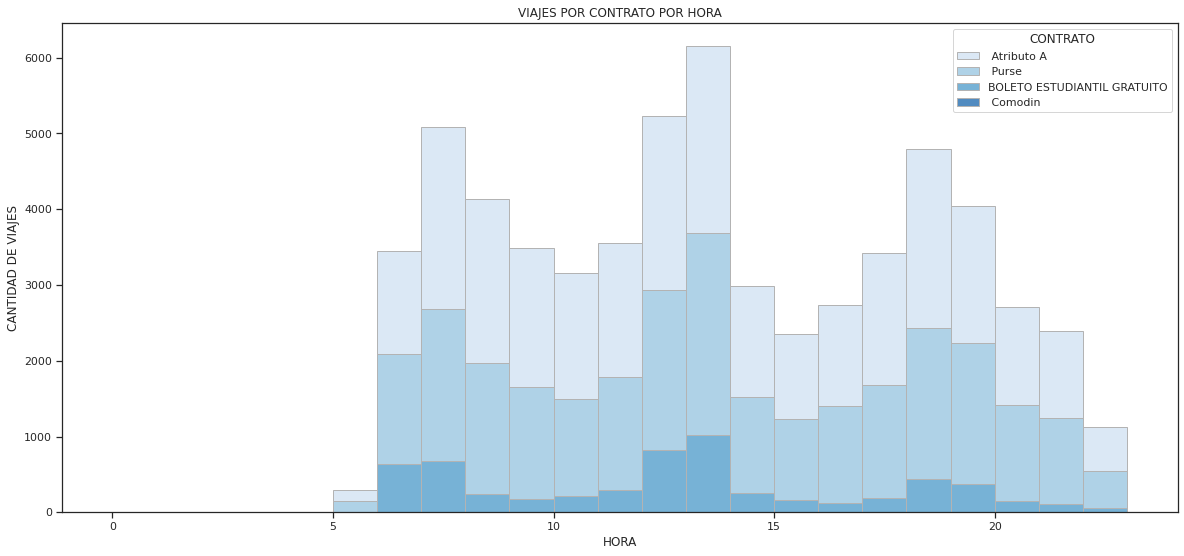

In [6]:
## Graficamos las transacciones totales por hora y por tipo de contrato

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(20, 9))

sns.histplot(
    dataframe,
    x="HORA", hue="CONTRATO",
    multiple="stack",
    palette="Blues",
    edgecolor=".7",
    binwidth=1,
    bins=24,
    )
  
ax.set(xlabel='HORA',
       ylabel='CANTIDAD DE VIAJES',
       title='VIAJES POR CONTRATO POR HORA')

## Mapa de calor que permite visualmente analizar la actividad por hora y por linea de la ciudad de Catamarca.

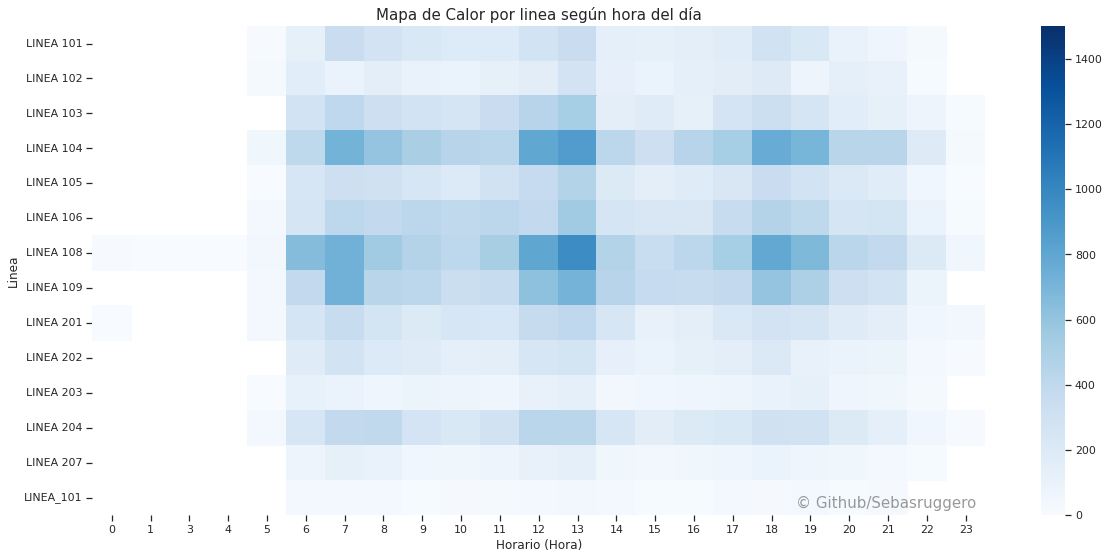

In [7]:
## Funcion para generar un hmap con los horarios con mas actividad

def hmap_diario(dataframe):

    # Data
    df = dataframe.copy()
    df["hour"] = pd.DatetimeIndex(df['FECHATRX']).hour
    df["linea"] = df['LINEA']
    daily_activity = df.groupby(by=['linea','hour']).count()['FECHATRX'].unstack()

    # Armamos la figura
    fig, ax = plt.subplots(figsize=(20,9))
    sns.heatmap(daily_activity, robust=True, vmin=0, vmax=1500, cmap="Blues") # "YlOrBr

    # Asignamos las etiquetas 
    plt.xlabel("Horario (Hora)", fontsize= 12, x = 0.5)
    plt.ylabel("Linea", fontsize= 12)
    plt.title("Mapa de Calor por linea según hora del día", fontsize= 15)

    # Marca Agua
    ax.text(0.99, 0.01, '© Github/Sebasruggero',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)   # Marca Agua

hmap_diario(dataframe)


## Mapa de calor por Ramal

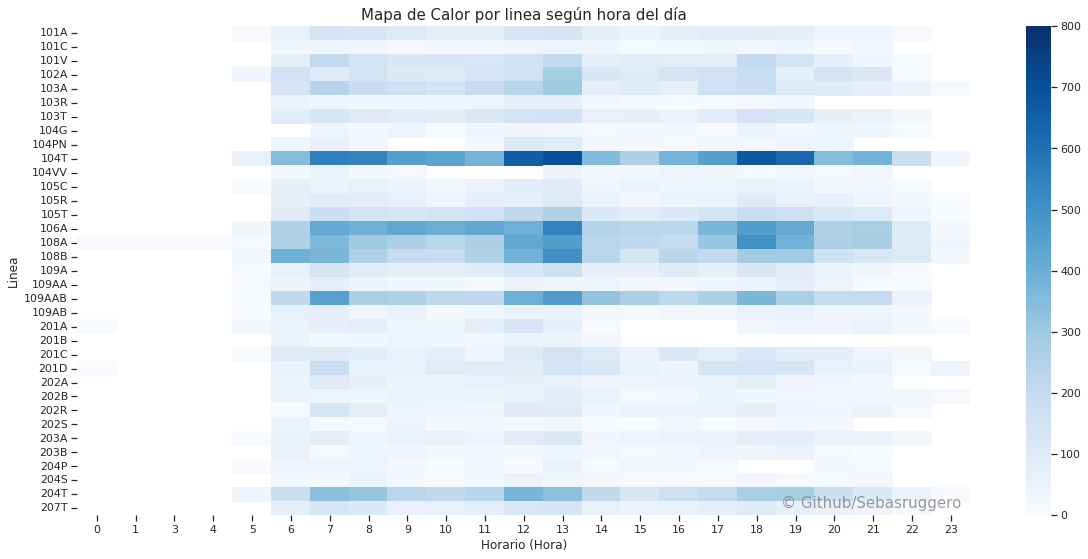

In [8]:
## Funcion para generar un hmap con los horarios con mas actividad

def hmap_diario(dataframe):

    # Data
    df = dataframe.copy()
    df["hour"] = pd.DatetimeIndex(df['FECHATRX']).hour
    df["linea"] = df['DESC_RAMAL']
    daily_activity = df.groupby(by=['linea','hour']).count()['FECHATRX'].unstack()

    # Armamos la figura
    fig, ax = plt.subplots(figsize=(20,9))
    sns.heatmap(daily_activity, robust=True, vmin=0, vmax=800, cmap="Blues") # "YlOrBr

    # Asignamos las etiquetas 
    plt.xlabel("Horario (Hora)", fontsize= 12, x = 0.5)
    plt.ylabel("Linea", fontsize= 12)
    plt.title("Mapa de Calor por linea según hora del día", fontsize= 15)

    # Marca Agua
    ax.text(0.99, 0.01, '© Github/Sebasruggero',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)   # Marca Agua

hmap_diario(dataframe)


## Mapa de calor por tipo de boleto

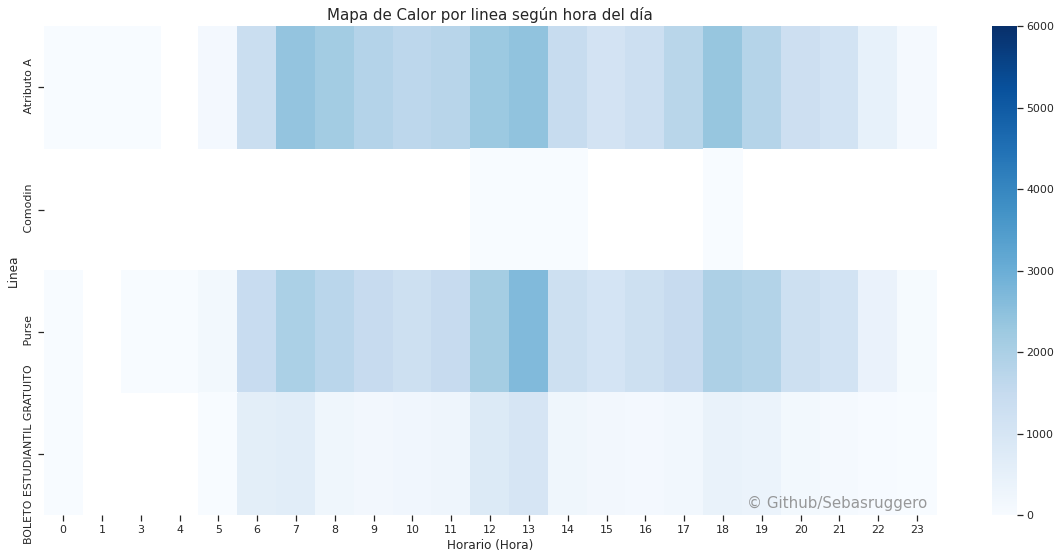

In [12]:
## Funcion para generar un hmap con los horarios con mas actividad

def hmap_diario(dataframe):

    # Data
    df = dataframe.copy()
    df["hour"] = pd.DatetimeIndex(df['FECHATRX']).hour
    df["linea"] = df['CONTRATO']
    daily_activity = df.groupby(by=['linea','hour']).count()['FECHATRX'].unstack()

    # Armamos la figura
    fig, ax = plt.subplots(figsize=(20,9))
    sns.heatmap(daily_activity, robust=True, vmin=0, vmax=6000, cmap="Blues") # "YlOrBr

    # Asignamos las etiquetas 
    plt.xlabel("Horario (Hora)", fontsize= 12, x = 0.5)
    plt.ylabel("Linea", fontsize= 12)
    plt.title("Mapa de Calor por linea según hora del día", fontsize= 15)

    # Marca Agua
    ax.text(0.99, 0.01, '© Github/Sebasruggero',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)   # Marca Agua

hmap_diario(dataframe)

## Mapa de calor por linea por tipo de boleto

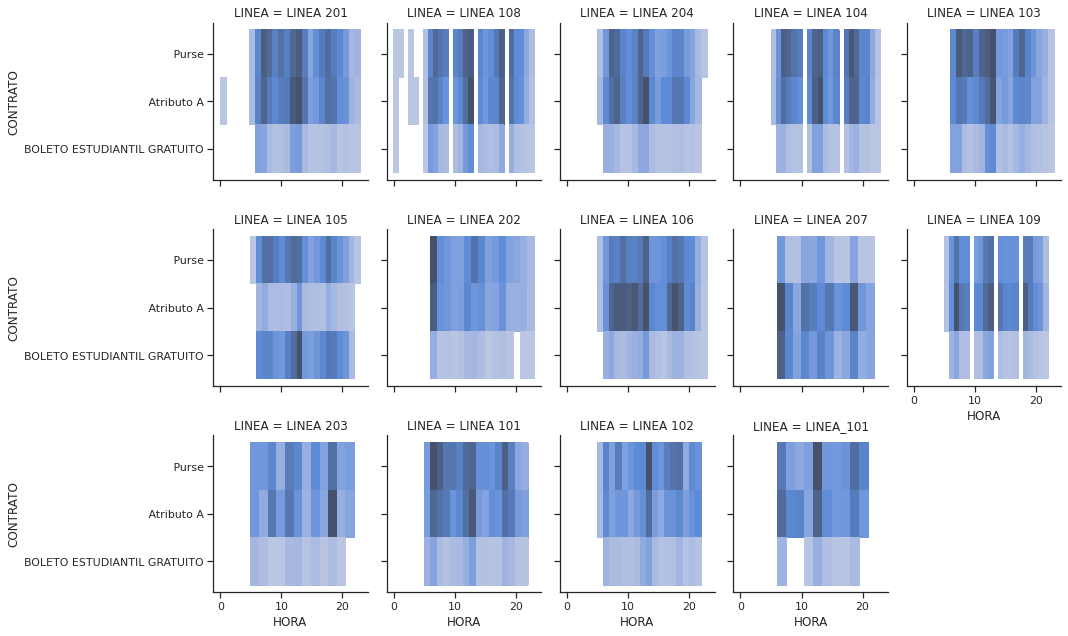

In [10]:
## Ahora vamos a graficar un mapa de calor por tipo de contrato por linea
df_filter = dataframe[dataframe.CONTRATO.isin([" Atributo A", " Purse", "BOLETO ESTUDIANTIL GRATUITO"])]
g = sns.FacetGrid(df_filter, col="LINEA", col_wrap= 5)
g.map(sns.histplot, "HORA", "CONTRATO")

## Histograma de total viajes diarios.

Text(0.99, 0.01, '© Github/Sebasruggero')

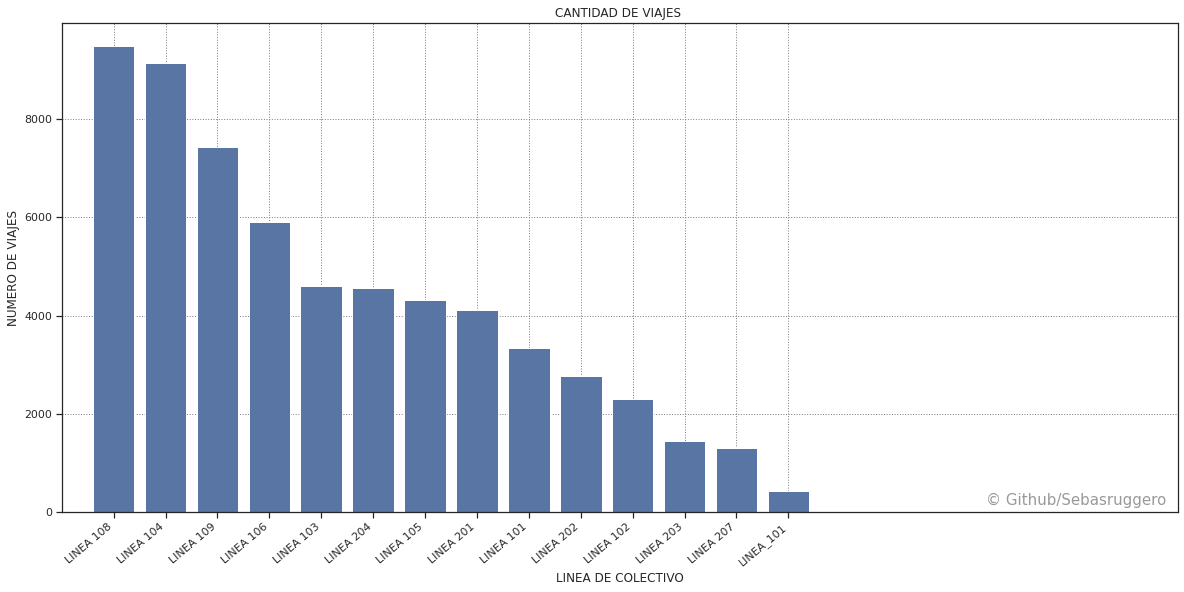

In [ ]:
 #Ranking de empresas por cantidad de transacciones
# Cargamos la data
df = dataframe.copy()
df["hour"] = pd.DatetimeIndex(df['FECHATRX']).hour
df["weekday"] = pd.DatetimeIndex(df['FECHATRX']).weekday
daily_activity = df.groupby(by=['weekday','hour']).count()['FECHATRX'].unstack()

# Dibujamos 
fig = plt.figure(figsize=(20,9))
ax = sns.countplot(x="LINEA" ,color="b", data=df, order = df['LINEA'].value_counts().index)

# Etiquetamos 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("LINEA DE COLECTIVO", fontsize= 12, x = 0.5)
plt.ylabel("NUMERO DE VIAJES", fontsize= 12)
plt.title("CANTIDAD DE VIAJES ")
plt.xlim(-1,20.5)

# Dibujamos la grilla
plt.grid(linestyle=":", color='grey')

# Marca Agua
ax.text(0.99, 0.01, '© Github/Sebasruggero',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)  

## Histograma cantidad de viajes por linea segun hora del dia

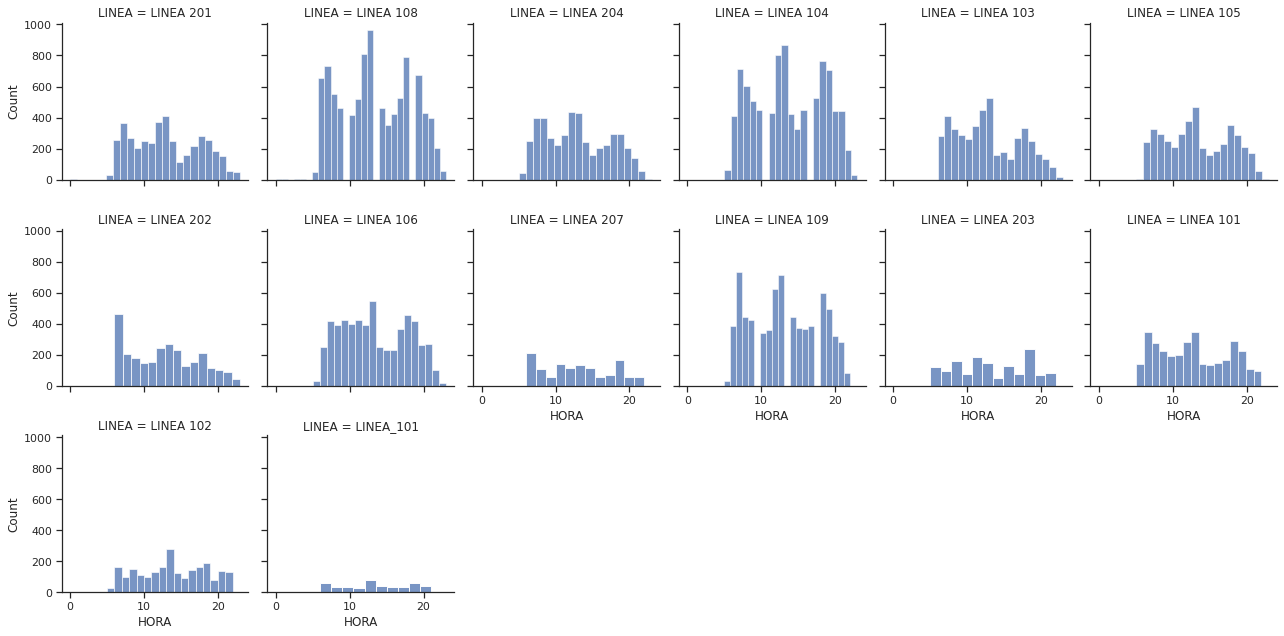

In [ ]:
## Ahora vamos a ver la cantidad de transacciones abierto por linea
g = sns.FacetGrid(dataframe, col="LINEA", col_wrap=6)
g.map(sns.histplot, "HORA")

## Mapa de calor representado en Folium ( Se puede filtrar por condicion)

In [41]:
## Mapa Calor

from folium.plugins import HeatMap


## Copiamos el dataframe
df = dataframe.copy()

#Filtramos las condiciones del mapa 

#h_df = df[(df.DESC_RAMAL =='203B')] # Filtramos por Ramal
h_df = df[(df.CONTRATO =='BOLETO ESTUDIANTIL GRATUITO')] # Filtramos por boleto estudiantil 

## Seteamos el mapa de folium
m = folium.Map(location=[-28.469581, -65.779544], tiles="OpenStreetMap",zoom_start=12)

## Armo la lista de pos
locations= [[row['LATITUDE'],row['LONGITUDE']] for index, row in h_df.iterrows()]

## Agrego la info al mapa y grafico el Mapa de Calor
HeatMap(locations, radius=7, blur= 5 ).add_to(m)

## Muestro el Mapa
display(m)





## Mapa Cluster - Utiliza los mismos filtros que se setearon en el anterior.

In [46]:
# Create a list of coordinate pairs
from folium.plugins import MarkerCluster

m = folium.Map(location=[-28.469581, -65.779544], tiles="OpenStreetMap",zoom_start=12)

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(m)

# Show map
m





In [47]:
outfp = "base_map.html"

m.save(outfp)

## Vamos a cruzar la información de las transacciones con el shape de los barrios populares del [RENABAP](https://https://www.argentina.gob.ar/desarrollosocial/renabap/mapa) para observar el acceso por parte de los habitantes a los servicios

In [ ]:
## Cargamos los set de datos de datos abiertos RENABAP
url = "https://datosabiertos.desarrollosocial.gob.ar/dataset/0d022767-9390-486a-bff4-ba53b85d730e/resource/97cc7d10-ad4c-46cb-9ee4-becb402adf9f/download/20220131_info_publica.geojson"
barrios_populares = gpd.read_file(url)
barrios_populares.head(1)

##Pasamos el dataframe a Geopandas
df_gpd = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(x=dataframe.LONGITUDE, y=dataframe.LATITUDE))

## Filtramos la provincia de Catamarca y la localidad que vamos a evaluar - En este caso la localidad de San Fernando del Valle de Catamarca en la Provincia de Catamarca
barrios = barrios_populares[(barrios_populares.Provincia =='Catamarca') & (barrios_populares.Localidad=='San Fernando Del Valle De Catamarca') ] # Filtramos por linea


## Superponemos ambos layer para poder vizualizar la actividad de transacciones en los barrios populares y tener un acercamiento a la cobertura del servicio.

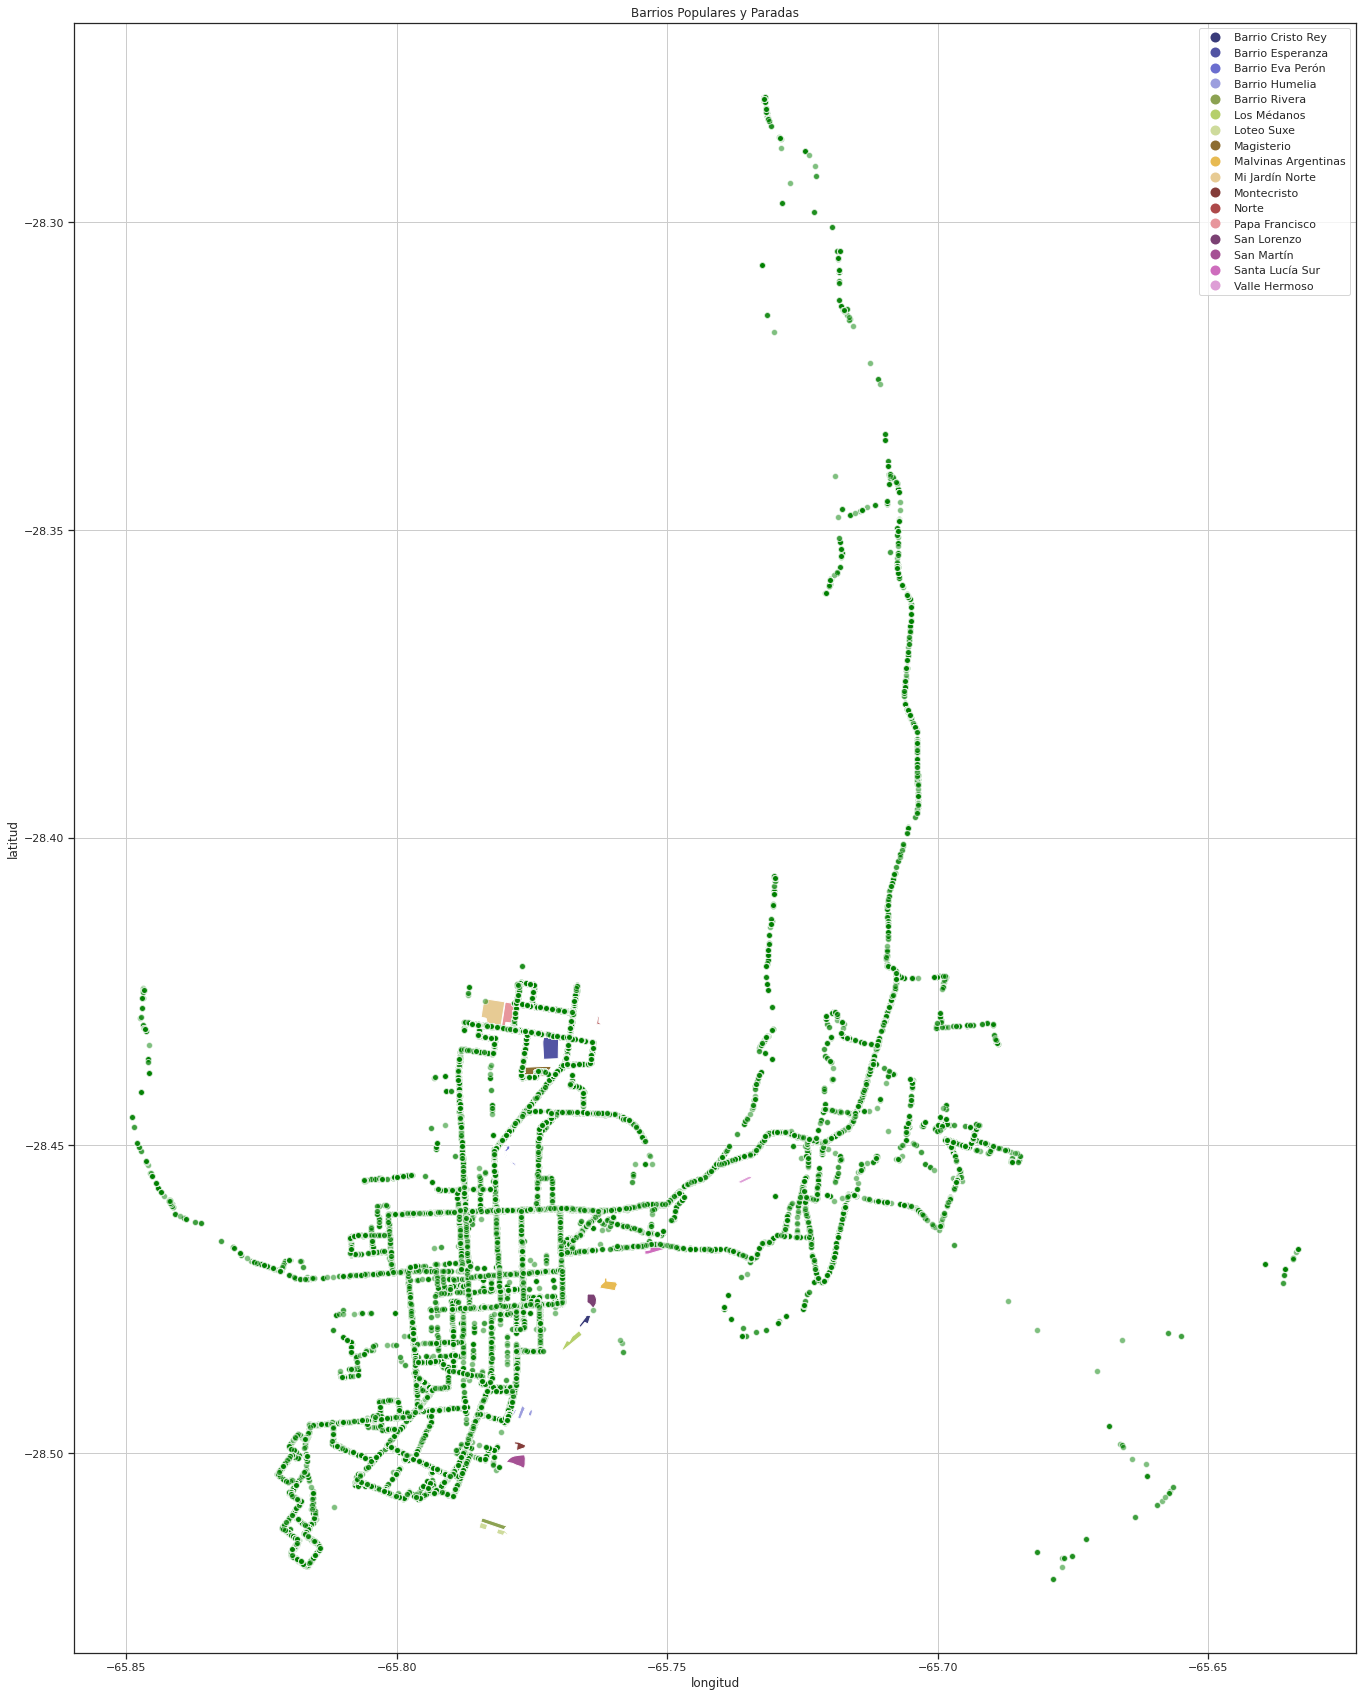

In [ ]:
# Graficamos el shape junto con los recorridos para poder observar 
barrios.plot(column='Barrio', legend=True , figsize=(30,30), cmap="tab20b")

# Agregamos los puntos del recorrido
plt.scatter(x=df_gpd.LONGITUDE, y=df_gpd.LATITUDE, c='green', edgecolor = 'white', alpha=0.5)

# Agegamos etiquetas y titulos
plt.title('Barrios Populares y Paradas')
plt.xlabel('longitud')
plt.ylabel('latitud')


# Agregamos grid y mostramos
plt.grid()
plt.show()

## Ahora vamos a determinar las transacciones que se realizaron dentro de los barrio populares ( Si bien esta información no es exacta porque la validación no es in-situ, podriamos estimar la cercania de los pasajeros a estos barrios.

In [ ]:
## Cramos el mapa en Folium con el Geodataser
m = folium.Map(location=[-28.469581, -65.779544], tiles="OpenStreetMap",zoom_start=12)
HeatMap(heat_data, radius=7, blur= 5 ).add_to(m)
folium.GeoJson(barrios.geometry).add_to(m)
display(m)
